In [2]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(891)
from nltk.corpus import stopwords
import re
import scipy.sparse
import nltk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelguel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michaelguel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/michaelguel/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
data = pd.read_csv('WELFake_Dataset.csv', sep= ',')


use = data

#print(use1.isna().sum())

#use = use1.dropna()

#use.head()

#print(use1.head())

#print(use1.shape)


#use = use.replace('',np.nan)

#print(use.shape)


use = use.dropna()

use.isnull().sum()

use.shape




#print(tracks.shape)

(71537, 4)

In [4]:
stop = set(stopwords.words('english'))
#Create a stemmer
stemmer = SnowballStemmer(language = 'english')
#Create a lemmatizer
lemma = WordNetLemmatizer()
#Stem and lemmatize a term
def lemmatize_stemming(term):
    term = lemma.lemmatize(term, pos='v') # Lemmatize
    term = stemmer.stem(term) #Stem
    return term

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text): #Deaccents and splits terms
        token = re.sub("\W","",token) #Remove special characters, punctuation, spaces

        token = token.lower() #lowercase string

        if token in stop: # Stopword removal: Remove "token not in stop" to keep stopwords
            token = ""

        if token.startswith("http"): #entity recognition of URLs.
            token = "URL_"

        if len(token) > 2:
            result.append(token)
    return result
# These will be applicable because the corpus contains special characters, punctuation, spaces, urls and accent
# terms

In [5]:
processed_docs = use['text'].map(preprocess)

processed_docs.head()

0    [comment, expected, barack, obama, members, fy...
2    [demonstrators, gathered, last, night, exercis...
3    [dozen, politically, active, pastors, came, pr...
4    [sarmat, missile, dubbed, satan, replace, flie...
5    [say, one, time, someone, sued, southern, pove...
Name: text, dtype: object

In [6]:
b = processed_docs

c = []

for x in b:
    c.append(len(x))


c = pd.DataFrame(c).reset_index(drop=True)

c = c.set_axis(['A'], axis='columns', copy=False)

d = c['A']



In [7]:
# Create a dictionary – word and its frequency in all documents
dictionary = gensim.corpora.Dictionary(processed_docs)
# Filter out infrequent terms appearing less than N times (no_below=N),
# terms appearing in more than 50% of documents (no_above=0.5), and keep
# only the top 100,000 terms (keep_n=100000)
dictionary.filter_extremes(no_below=500, no_above=0.5, keep_n=100000)
# Convert dictionary to document – bag of words matrix
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs] #list of lists
#convert the bag of words list of lists to a sparse matrix
term_doc_matrix = gensim.matutils.corpus2csc(bow_corpus)
doc_term_matrix = term_doc_matrix.transpose()
print(doc_term_matrix.shape)

(71537, 4886)


In [8]:
df = pd.DataFrame(doc_term_matrix.toarray().astype('int32'),columns=dictionary.values())

df.head()

,accountable,actually,aired,allegedly,alone,already,america,american,another,anyway,...,mistakes,aligned,loving,refuge,jihadists,asserted,participants,prosecuted,awards,beauty
0,1,1,1,1,1,3,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
processed_docs2 = use['title'].map(preprocess)

processed_docs2.head()
# Create a dictionary – word and its frequency in all documents
dictionary2 = gensim.corpora.Dictionary(processed_docs2)
# Filter out infrequent terms appearing less than N times (no_below=N),
# terms appearing in more than 50% of documents (no_above=0.5), and keep
# only the top 100,000 terms (keep_n=100000)
dictionary2.filter_extremes(no_below=.25, no_above=0.5, keep_n=100000)
# Convert dictionary to document – bag of words matrix
bow_corpus2 = [dictionary2.doc2bow(doc) for doc in processed_docs2] #list of lists
#convert the bag of words list of lists to a sparse matrix
term_doc_matrix2 = gensim.matutils.corpus2csc(bow_corpus2)
doc_term_matrix2 = term_doc_matrix2.transpose()
print(doc_term_matrix2.shape)

(71537, 29690)


In [10]:
b = processed_docs2

c = []

for x in b:
    c.append(len(x))


c = pd.DataFrame(c).reset_index(drop=True)

c = c.set_axis(['B'], axis='columns', copy=False)

e = c['B']

In [11]:
df2 = pd.DataFrame(doc_term_matrix2.toarray().astype('int32'),columns=dictionary2.values())

df2.head()

,alert,cops,enforcement,following,high,law,terrorists,threats,video,attorney,...,politico,age,shots,ground,jay,fails,colombia,showing,doctors,prevent
0,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y = use.loc[:,'label']
x = df
z = df2
v = d
u = e
print(y.shape)
print(x.shape)
print(z.shape)
print(v.shape)
print(u.shape)


(71537,)
(71537, 4886)
(71537, 2262)
(71537,)
(71537,)


In [36]:
from sklearn.preprocessing import StandardScaler
# Peform Split with validation size 40% and training 60%
X_train, X_test, y_train, y_test, z_train, z_test, v_train, v_test, u_train, u_test = train_test_split(x, y, z, v, u, test_size = 0.3, random_state=42)

In [14]:
scaler = StandardScaler()
v_train = scaler.fit_transform(pd.DataFrame(v_train))
v_test = scaler.transform(pd.DataFrame(v_test))
model = LogisticRegression(solver = "lbfgs", max_iter=1000)
model.fit(pd.DataFrame(v_train), y_train)
y_pred = model.predict(pd.DataFrame(v_test))
score = accuracy_score(y_test, y_pred)
print("Accuracy score: {}%".format(round(score*100)))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy score: 56%
Precision: 0.541
Recall: 0.848


In [15]:
v_train = pd.DataFrame(v_train).reset_index(drop=True)

v_train = v_train.set_axis(['D'], axis='columns', copy=False)

v_train = v_train['D']

print(v_train)

v_test = pd.DataFrame(v_test).reset_index(drop=True)

v_test = v_test.set_axis(['D'], axis='columns', copy=False)

v_test = v_test['D']

print(v_test)

0        0.877663
1        0.329113
2       -0.376166
3       -0.198339
4       -0.370138
           ...   
50070   -0.629343
50071    3.065837
50072    0.066894
50073   -0.095863
50074   -0.475628
Name: D, Length: 50075, dtype: float64
0       -0.737847
1        1.170023
2       -0.761960
3        1.818035
4       -0.795114
           ...   
21457   -0.119975
21458   -0.888548
21459   -0.409320
21460   -0.780044
21461   -0.822240
Name: D, Length: 21462, dtype: float64


In [16]:
scaler = StandardScaler()
u_train = scaler.fit_transform(pd.DataFrame(u_train))
u_test = scaler.transform(pd.DataFrame(u_test))
model = LogisticRegression(solver = "lbfgs", max_iter=1000)
model.fit(pd.DataFrame(u_train), y_train)
y_pred = model.predict(pd.DataFrame(u_test))
score = accuracy_score(y_test, y_pred)
print("Accuracy score: {}%".format(round(score*100)))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy score: 61%
Precision: 0.620
Recall: 0.597


In [17]:
u_train = pd.DataFrame(u_train).reset_index(drop=True)

u_train = u_train.set_axis(['C'], axis='columns', copy=False)

u_train = u_train['C']

print(u_train)

u_test = pd.DataFrame(u_test).reset_index(drop=True)

u_test = u_test.set_axis(['C'], axis='columns', copy=False)

u_test = u_test['C']

print(u_test)

0        1.488341
1       -0.629713
2       -0.629713
3        0.429314
4        0.429314
           ...   
50070    0.076305
50071    1.135332
50072    0.782323
50073    0.429314
50074    1.488341
Name: C, Length: 50075, dtype: float64
0        0.429314
1       -0.629713
2       -0.276704
3       -2.394759
4        0.076305
           ...   
21457    0.429314
21458    0.429314
21459    1.135332
21460   -0.276704
21461    1.135332
Name: C, Length: 21462, dtype: float64


In [38]:
print('Features before PCA: {}'.format(X_train.shape[1]))
# Initialize scaler, fit/transform train data and transform test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize PCA to peforme dimension reduction on the current 445 features
pca = PCA(n_components = 500)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


Features before PCA: 4886


Text(0.5, 1.0, 'Scree Plot')

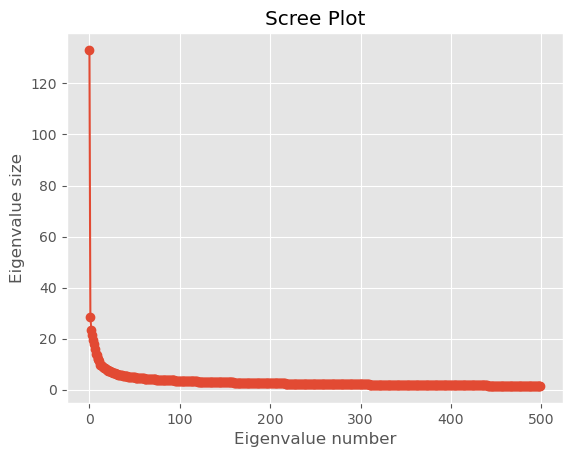

In [39]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [43]:
X_train_pca

array([[10.9763618 , -4.18327005, 15.84846138, ..., -2.34615438,
        -1.94014035, -1.01555812],
       [ 3.76826065, -7.31725687,  0.04484611, ..., -0.32520406,
         1.39685731, -0.07526553],
       [-4.85653113, -2.57023524,  0.87190897, ..., -1.00301158,
        -0.31386625, -0.343607  ],
       ...,
       [ 0.59768973, -3.15587602, -0.40822533, ..., -0.34951502,
        -0.78608586,  0.59348171],
       [-1.60981732, -0.85007108, -8.01977373, ..., -0.07522947,
         1.04887739, -1.63086752],
       [-5.1007293 ,  1.06185817,  0.18479113, ..., -0.39146446,
        -0.72989086,  0.0836121 ]])

In [34]:
model = LogisticRegression(solver = "lbfgs", max_iter=2000)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
score = accuracy_score(y_test, y_pred)
print("Accuracy score: {}%".format(round(score*100)))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy score: 88%
Precision: 0.870
Recall: 0.898


In [89]:
X_train_pca.shape

X_test_pca.shape

(28615, 500)

In [101]:
print('Features before PCA: {}'.format(z_train.shape[1]))
# Initialize scaler, fit/transform train data and transform test data
scaler = StandardScaler()
z_train = scaler.fit_transform(z_train)
z_test = scaler.transform(z_test)
# Initialize PCA to peforme dimension reduction on the current 445 features
pca = PCA(n_components = 10)
z_train_pca = pca.fit_transform(z_train)
z_test_pca = pca.transform(z_test)



Features before PCA: 2262


In [102]:
pca.explained_variance_ratio_

array([0.00163764, 0.00140543, 0.00131619, 0.00125118, 0.00121756,
       0.00117172, 0.00109839, 0.0010598 , 0.00105403, 0.00103413,
       0.00101662, 0.00101335, 0.00100943, 0.00099549, 0.00097654,
       0.00097213, 0.00096919, 0.00095548, 0.00094617, 0.00094026,
       0.00093335, 0.00092646, 0.0009187 , 0.00091463, 0.00091205,
       0.00090242, 0.00089611, 0.00088844, 0.00087838, 0.00087322,
       0.00086552, 0.00085913, 0.00085814, 0.00084898, 0.00084412,
       0.00084159, 0.00083902, 0.00083736, 0.00083223, 0.00082814,
       0.00082236, 0.00082091, 0.00081217, 0.00080835, 0.00080398,
       0.0007971 , 0.0007959 , 0.00079003, 0.00077997, 0.00077631])

Text(0.5, 1.0, 'Scree Plot')

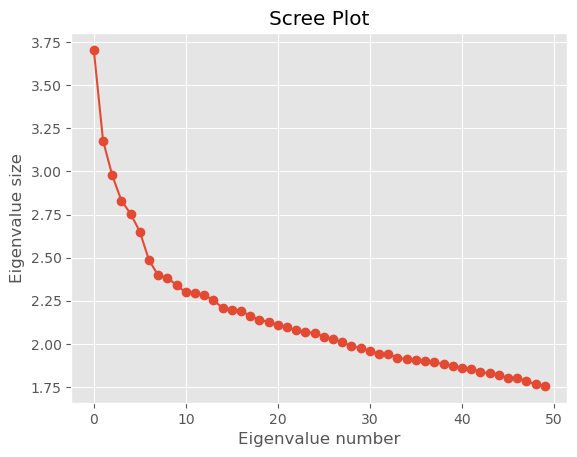

In [103]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [94]:
model = LogisticRegression(solver = "lbfgs", max_iter=1000)
model.fit(z_train_pca, y_train)
y_pred = model.predict(z_test_pca)
score = accuracy_score(y_test, y_pred)
print("Accuracy score: {}%".format(round(score*100)))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy score: 79%
Precision: 0.797
Recall: 0.782


In [90]:
z_train_pca.shape

z_test_pca.shape

(28615, 200)

In [72]:
t_train_pca = pd.merge(pd.DataFrame(X_train_pca), pd.DataFrame(z_train_pca),left_index=True, right_index=True)

r_train_pca = pd.merge(pd.DataFrame(t_train_pca), v_train,left_index=True, right_index=True)

w_train_pca = pd.merge(pd.DataFrame(r_train_pca), u_train,left_index=True, right_index=True)

t_test_pca = pd.merge(pd.DataFrame(X_test_pca), pd.DataFrame(z_test_pca),left_index=True, right_index=True)

r_test_pca = pd.merge(pd.DataFrame(t_test_pca), v_test,left_index=True, right_index=True)

w_test_pca = pd.merge(pd.DataFrame(r_test_pca), u_test,left_index=True, right_index=True)

print(w_train_pca.shape)

print(w_test_pca.shape)

w_train_pca.columns=["principal component"+str(i) for i in range(1, w_train_pca.shape[1] + 1)]

w_test_pca.columns=["principal component"+str(i) for i in range(1, w_test_pca.shape[1] + 1)]

(50075, 1502)
(21462, 1502)


In [73]:
model = LogisticRegression(solver = "lbfgs", max_iter=2000)
model.fit(w_train_pca, y_train)

LogisticRegression(max_iter=2000)

In [74]:
y_pred = model.predict(w_test_pca)
score = accuracy_score(y_test, y_pred)
print("Accuracy score: {}%".format(round(score*100)))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy score: 94%
Precision: 0.941
Recall: 0.934


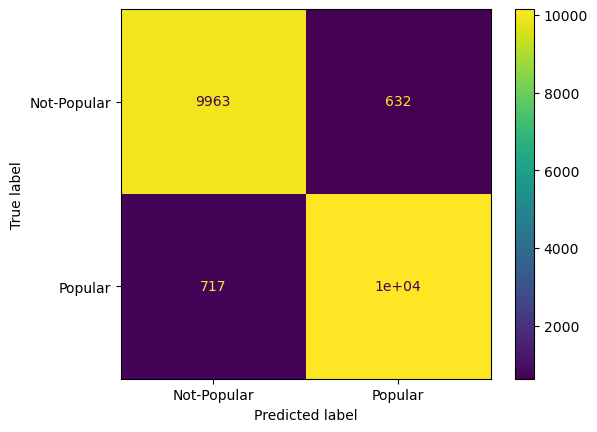

In [75]:
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Not-Popular', 'Popular'])

cm_display.plot()
plt.show()